In [1]:
import sys
sys.path.append('..')

from preference_datasets import get_batch_iterator
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel, PeftConfig
import datasets
import matplotlib.pyplot as plt
import random

In [2]:
lora_dir='/scratch/ssumathi/Re-tuning/ReTuning-main/cache/ssumathi/my_baseline_parity1_2024-11-12_06-41-48_446581/LATEST'

model = AutoModelForCausalLM.from_pretrained('huggyllama/llama-7b',torch_dtype=torch.float16,device_map='auto')
model = PeftModel.from_pretrained(model, lora_dir,offload_buffer=True)

tokenizer = AutoTokenizer.from_pretrained("huggyllama/llama-7b")
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

/scratch/ssumathi/Re-tuning/retuning_env/lib/python3.8/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
def generate_from_prompt(model,prompt,tokenizer):
    input_tok=tokenizer(prompt,add_special_tokens=False)
    input_ids=torch.LongTensor(input_tok['input_ids']).cuda()
    attention_mask=torch.LongTensor(input_tok['attention_mask']).cuda()
    tokenized_samples = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=2048, 
        do_sample=False, 
        pad_token_id=tokenizer.pad_token_id
    )
    return tokenizer.batch_decode(tokenized_samples,skip_special_tokens=True)

def generate_binary_list(n):
    binary_list = [random.choice([0, 1]) for _ in range(n)]
    return binary_list

In [7]:
prompt_template='What is the parity of {}?\nSolution: '
res_dict={}
eval_lengths=range(2,60)
for length in eval_lengths:
    print(f"evaluating length:{length}")
    num_right=0
    for _ in range(15):
        arr=generate_binary_list(length)
        out=generate_from_prompt(model,[prompt_template.format(arr)],tokenizer)
        if out[0].rstrip()[-1]==str(arr.count(1)%2):num_right+=1
    res_dict[length]=num_right
    print(res_dict)
print(res_dict)

evaluating length:2
{2: 8}
evaluating length:3
{2: 8, 3: 6}
evaluating length:4
{2: 8, 3: 6, 4: 8}
evaluating length:5
{2: 8, 3: 6, 4: 8, 5: 9}
evaluating length:6
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9}
evaluating length:7
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6}
evaluating length:8
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4}
evaluating length:9
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7}
evaluating length:10
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4}
evaluating length:11
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10}
evaluating length:12
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10, 12: 8}
evaluating length:13
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10, 12: 8, 13: 7}
evaluating length:14
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10, 12: 8, 13: 7, 14: 9}
evaluating length:15
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10, 12: 8, 13: 7, 14: 9, 15: 7}
evaluating length:16
{2: 8, 3: 6, 4: 8, 5: 9

{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10, 12: 8, 13: 7, 14: 9, 15: 7, 16: 7, 17: 8, 18: 10, 19: 10, 20: 3, 21: 6, 22: 10, 23: 11, 24: 11, 25: 9, 26: 6, 27: 10, 28: 8, 29: 9, 30: 5, 31: 6, 32: 7, 33: 10, 34: 8, 35: 9, 36: 4, 37: 6, 38: 7, 39: 10, 40: 9, 41: 7, 42: 6, 43: 5, 44: 7, 45: 6, 46: 8, 47: 7, 48: 7}
evaluating length:49
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10, 12: 8, 13: 7, 14: 9, 15: 7, 16: 7, 17: 8, 18: 10, 19: 10, 20: 3, 21: 6, 22: 10, 23: 11, 24: 11, 25: 9, 26: 6, 27: 10, 28: 8, 29: 9, 30: 5, 31: 6, 32: 7, 33: 10, 34: 8, 35: 9, 36: 4, 37: 6, 38: 7, 39: 10, 40: 9, 41: 7, 42: 6, 43: 5, 44: 7, 45: 6, 46: 8, 47: 7, 48: 7, 49: 6}
evaluating length:50
{2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10, 12: 8, 13: 7, 14: 9, 15: 7, 16: 7, 17: 8, 18: 10, 19: 10, 20: 3, 21: 6, 22: 10, 23: 11, 24: 11, 25: 9, 26: 6, 27: 10, 28: 8, 29: 9, 30: 5, 31: 6, 32: 7, 33: 10, 34: 8, 35: 9, 36: 4, 37: 6, 38: 7, 39: 10, 40: 9, 41: 7, 42: 6, 

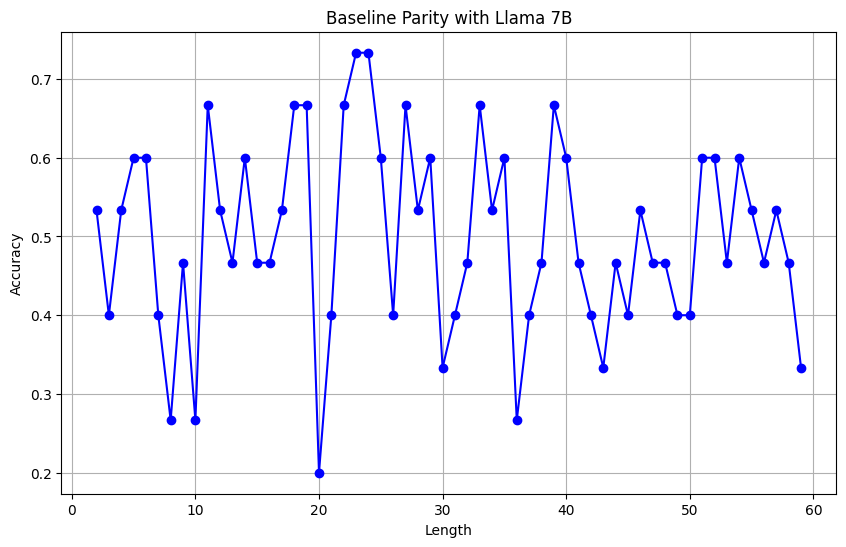

In [8]:
import matplotlib.pyplot as plt

accuracy_data = {
    2: 8, 3: 6, 4: 8, 5: 9, 6: 9, 7: 6, 8: 4, 9: 7, 10: 4, 11: 10, 12: 8, 13: 7, 
    14: 9, 15: 7, 16: 7, 17: 8, 18: 10, 19: 10, 20: 3, 21: 6, 22: 10, 23: 11, 
    24: 11, 25: 9, 26: 6, 27: 10, 28: 8, 29: 9, 30: 5, 31: 6, 32: 7, 33: 10, 
    34: 8, 35: 9, 36: 4, 37: 6, 38: 7, 39: 10, 40: 9, 41: 7, 42: 6, 43: 5, 
    44: 7, 45: 6, 46: 8, 47: 7, 48: 7, 49: 6, 50: 6, 51: 9, 52: 9, 53: 7, 
    54: 9, 55: 8, 56: 7, 57: 8, 58: 7, 59: 5
}


lengths = list(accuracy_data.keys())
accuracies = [correct / 15 for correct in accuracy_data.values()]


plt.figure(figsize=(10, 6))
plt.plot(lengths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Length')
plt.ylabel('Accuracy')
plt.title('Baseline Parity with Llama 7B')
plt.grid(True)
plt.show()
